In [1]:
# import the fun
import sys
import numpy as np
import math
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
import Guided_TabDiffusionTools as GTDT

from sklearn.decomposition import PCA

import matplotlib.pyplot as plt

from HullParameterization import Hull_Parameterization as HP

np.set_printoptions(suppress=True) # don't use scientific notation


In [2]:
# Load in the Data:

#Step 1: Load in the data
folder = 'HullParam_MultiObj/'
path = './Restructured_Dataset/'
X = np.load(path + folder +'X_num_train.npy')
#Y = np.load(path + folder+ 'Y_MultiObj.npy')
Y = np.load(path + folder+ 'y_train.npy')

print(np.min(Y,axis=0))

Cons = np.zeros((len(X),1))

Y_stats = np.array([np.mean(Y,axis=0), np.std(Y,axis=0)])


neg_folder = 'NegativeData/'

X_neg = np.load(path + neg_folder +'X_negativeData.npy')
Y_neg = np.load(path + neg_folder +'Y_negativeData.npy')
Cons_neg = np.zeros((len(X_neg),1))+1
 #np.load(neg_path+'Con_SatisfyVec.npy')




X_LIMITS = np.load(path+'X_LIMITS.npy')

X_lower_lim = [X_LIMITS[:,0].tolist()]                   
X_upper_lim = [X_LIMITS[:,1].tolist()]



#X_set = np.concatenate((X,X_neg))

Y_set = [[1],[1]] #np.concatenate((Y,Y_neg))

[-162.75035      -3.3441992    -2.4861941    -0.5535028    -0.6715196
   -0.80750316   -3.834086  ]


In [3]:
# Set up the file for architecting the network, diffusion parameters, and training

DDPM_Dict = {
        'xdim' : len(X[0]),             # Dimension of parametric design vector
        'datalength': len(X),           # number of samples
        'X_LL' : X_lower_lim,           # lower limits of parametric design vector variables
        'X_UL' : X_upper_lim,
        'ydim': len(Y_set[0]),          # Number of objectives
        'cdim': len(Cons[0]),           # number of classes for classifier
        'gamma' : 0.5,                  # weight of feasibility guidence for guided sampling
        'lambdas': [1,1,1,1,1,1,1],     # dummy variable for performance guided sampling
        'tdim': 128,                    # dimension of latent variable
        'net': [1024,1024,1024,1024],   # network architecture
        'batch_size': 1024,             # batch size
        'Training_Epochs': 100000,      # number of training epochs
        'Diffusion_Timesteps': 1000,    # number of diffusion timesteps
        'lr' : 0.00025,                 # learning rate
        'weight_decay': 0.0,            # weight decay
        'device_name': 'cuda:0'}        # gpu device name

# Set up the file for architecting the network, diffusion parameters, and training

Classify_Dict = {
        'xdim' : len(X[0]),
        'cdim': len(Cons[0]),
        'tdim': 128,
        'net': [64,64,64],
        'Training_Epochs': 150000,
        'device_name': 'cuda:0'}


#Regression model Dict
Reg_Dict = {
        'xdim' : len(X[0]),                     # Dimension of parametric design vector
        'ydim': 1,                              # trains regression model for each objective
        'tdim': 256,                            # dimension of latent variable
        'net': [256,256],                       # network architecture        
        'Training_Epochs': 10000,               # number of training epochs
        'num_regressors': 7,                    # number of regressors to train
        'Model_Labels': ['Regressor_Cw',        # labels for regressors
                        'Regressor_SA_050',
                        'Regressor_SA_100',
                        'Regressor_Vol_050',
                        'Regressor_Vol_100',
                        'Regressor_MaxBox_Volume',
                        'Regressor_GaussianCurvature'],
        'lr' : 0.001,                          # learning rate
        'weight_decay': 0.0,                   # weight decay
        'device_name': 'cuda:0'}               # gpu device name


T = GTDT.GuidedDiffusionEnv(DDPM_Dict,
                Classify_Dict,
                Reg_Dict,
                X=X,
                Y=Y,
                Cons = Cons,
                X_neg=X_neg,
                Cons_neg=Cons_neg)

In [4]:
'''
===================================================
train classifier
==================================================
'''

T.run_train_classifier_loop(batches_per_epoch=1)

PATH =  './'

name = 'Constraint_Classifier' +'_'+ str(Classify_Dict['Training_Epochs']) + 'Epochs'

T.Save_classifier_model(PATH, name)

'''
classifier_path = '' 

T.load_trained_classifier_model(classifier_path)
'''

Classifier Model Training...


100%|██████████| 150000/150000 [01:18<00:00, 1901.91it/s]

F1 score: 0.9987129987129987
Classifier Training Complete!


"\nclassifier_path = '' \n\nT.load_trained_classifier_model(classifier_path)\n"

In [5]:
'''
===================================================
train regressor
==================================================
'''
T.run_train_regressors_loop(batches_per_epoch=1)

PATH =  './'

name


Regressor Model Training...
Training Regression for Objective: 0


100%|██████████| 10000/10000 [00:06<00:00, 1572.99it/s]


Regression Model Training for Objective 0 Complete!
R2 score of Y:0.9881193647385326
Training Regression for Objective: 1


100%|██████████| 10000/10000 [00:06<00:00, 1559.49it/s]


Regression Model Training for Objective 1 Complete!
R2 score of Y:0.9918173942082282
Training Regression for Objective: 2


100%|██████████| 10000/10000 [00:06<00:00, 1567.64it/s]


Regression Model Training for Objective 2 Complete!
R2 score of Y:0.9911358795354419
Training Regression for Objective: 3


100%|██████████| 10000/10000 [00:06<00:00, 1552.32it/s]


Regression Model Training for Objective 3 Complete!
R2 score of Y:0.9914986393799935
Training Regression for Objective: 4


100%|██████████| 10000/10000 [00:06<00:00, 1580.12it/s]


Regression Model Training for Objective 4 Complete!
R2 score of Y:0.9920400652777145
Training Regression for Objective: 5


100%|██████████| 10000/10000 [00:06<00:00, 1540.68it/s]


Regression Model Training for Objective 5 Complete!
R2 score of Y:0.8279007539552751
Training Regression for Objective: 6


100%|██████████| 10000/10000 [00:06<00:00, 1565.16it/s]

Regression Model Training for Objective 6 Complete!
R2 score of Y:0.926050878203298
Regressor Training Complete!


'Constraint_Classifier_150000Epochs'

In [6]:
'''
================================================
train diffusion model
==================================================
'''

T.run_train_diffusion_loop(batches_per_epoch=1)


PATH =  './'

name = folder[:-1]+ '_Constraintguided' +'_'+ str(DDPM_Dict['Training_Epochs']) + 'Epochs'

T.Save_diffusion_model(PATH, name)

'''
diffusion_path = './'
T.load_trained_diffusion_model(diffusion_path)
'''

Denoising Model Training...


  5%|▌         | 5125/100000 [00:08<02:29, 634.83it/s]

Step 5000/100000 Loss: 0.06560035049915314


 10%|█         | 10079/100000 [00:15<02:21, 637.18it/s]

Step 10000/100000 Loss: 0.06501168757677078


 15%|█▌        | 15111/100000 [00:24<02:14, 629.03it/s]

Step 15000/100000 Loss: 0.0594242624938488


 20%|██        | 20095/100000 [00:31<02:05, 634.76it/s]

Step 20000/100000 Loss: 0.0665987953543663


 25%|██▌       | 25078/100000 [00:39<01:57, 635.70it/s]

Step 25000/100000 Loss: 0.05529603362083435


 30%|███       | 30065/100000 [00:47<01:50, 633.03it/s]

Step 30000/100000 Loss: 0.059205763041973114


 35%|███▌      | 35110/100000 [00:55<01:43, 628.46it/s]

Step 35000/100000 Loss: 0.0495617613196373


 40%|████      | 40094/100000 [01:03<01:34, 633.11it/s]

Step 40000/100000 Loss: 0.05534721538424492


 45%|████▌     | 45127/100000 [01:11<01:26, 632.15it/s]

Step 45000/100000 Loss: 0.06997425854206085


 50%|█████     | 50126/100000 [01:19<01:17, 643.16it/s]

Step 50000/100000 Loss: 0.05402715876698494


 55%|█████▌    | 55079/100000 [01:27<01:10, 638.44it/s]

Step 55000/100000 Loss: 0.051914066076278687


 60%|██████    | 60088/100000 [01:35<01:03, 625.38it/s]

Step 60000/100000 Loss: 0.0605313703417778


 65%|██████▌   | 65110/100000 [01:43<00:54, 638.90it/s]

Step 65000/100000 Loss: 0.05408436805009842


 70%|███████   | 70072/100000 [01:50<00:47, 636.22it/s]

Step 70000/100000 Loss: 0.062442898750305176


 75%|███████▌  | 75126/100000 [01:59<00:39, 633.34it/s]

Step 75000/100000 Loss: 0.050897251814603806


 80%|████████  | 80078/100000 [02:06<00:31, 639.35it/s]

Step 80000/100000 Loss: 0.05279397591948509


 85%|████████▌ | 85106/100000 [02:14<00:23, 636.83it/s]

Step 85000/100000 Loss: 0.06328960508108139


 90%|█████████ | 90086/100000 [02:22<00:15, 637.21it/s]

Step 90000/100000 Loss: 0.05833309516310692


 95%|█████████▌| 95100/100000 [02:30<00:07, 637.36it/s]

Step 95000/100000 Loss: 0.05124145373702049


100%|██████████| 100000/100000 [02:38<00:00, 632.47it/s]

Step 100000/100000 Loss: 0.05124564841389656
Denoising Model Training Complete!


"\ndiffusion_path = './'\nT.load_trained_diffusion_model(diffusion_path)\n"

In [7]:
# Gen Samples:
num_samples = 10
COND = np.zeros((num_samples,1)) +0.0


#COND[:,4] = 1.0

weights = GTDT.generate_performance_weights(num_samples,len(T.regressors),gen_type='random')



X_gen, unnorm = T.gen_perf_samples(COND,weights)
Y_gen = T.Predict_Perf_numpy(X_gen)



Y_gen_stats = np.array([np.mean(Y_gen,axis=0), np.std(Y_gen,axis=0)])

save_folder = 'HullParam_7Obj/'
save_path = './Generated_Samples/'

np.save(save_path + save_folder + 'X_gen_7Obj.npy',X_gen)
np.save(save_path+save_folder+ 'Y_gen_7Obj_pred.npy', Y_gen)





100%|██████████| 199/199 [00:00<00:00, 2057.23it/s]


In [8]:
'''
=======================

EVAL SAMPLES

========================
'''
tens = np.zeros((len(X_gen),1))+10

x_samples = np.concatenate((tens,X_gen[:,-44:]),axis=-1)

# Clean Up the Vectors
idx_BBFactors = [33,34,35,36,37]
idx_BB = 31

idx_SBFactors = [38,39,40,41,42,43,44]
idx_SB = 32

for i in range(0,len(x_samples)):
    
    x_samples[i,idx_BB] = (x_samples[i,idx_BB] + 0.5) // 1 #int rounds to 1 or 0
    x_samples[i,idx_SB] = (x_samples[i,idx_SB] + 0.5) // 1 #int rounds to 1 or 0
    
    
    x_samples[i,idx_BBFactors] = x_samples[i,idx_BB] * x_samples[i,idx_BBFactors] 
    x_samples[i,idx_SBFactors] = x_samples[i,idx_SB] * x_samples[i,idx_SBFactors]



#Check the constraint violations for the sampled designs
constraints = []
sum_violation = []
cons = []

for i in range(0,len(x_samples)):
    hull = HP(x_samples[i])
    constraints.append(hull.input_Constraints())
    cons.append(constraints[i] > 0)
    sum_violation.append(sum(cons[i]))
    

'''
Now let's figure out which boats do not have any constraint violations and 
learn about them


'''
idx_ZeroCV = [] #going to be a list of boats without violations


max_CV = max(sum_violation) 

count_CV = np.zeros((max_CV+1,))

idx_CV = np.zeros((len(cons[0]),))

Avg_CV = np.mean(sum_violation)

for i in range(0,len(sum_violation)):
    count_CV[sum_violation[i]] +=1
    if sum_violation[i] == 0:
        idx_ZeroCV.append(i)

cons = np.array(cons)
for i in range(0,len(cons[0])):
    idx_CV[i] = sum(cons[:,i])



print(str(int(count_CV[0])) + '/' + str(num_samples))



9/10


In [9]:
print(Y_stats)

print(Y_gen_stats)


[[-73.40448     -1.7150079   -1.0859978    4.7820187    3.8042588
   -0.40720683   2.4361162 ]
 [ 17.37735      0.5347935    0.44507143   0.80843306   0.6153565
    0.09936365   0.5294481 ]]
[[-92.61987     -2.0642245   -1.4398849    5.428467     4.333011
   -0.4380344    2.5875573 ]
 [ 13.220052     0.23573256   0.27491105   0.69523495   0.5971223
    0.04508397   0.20812511]]


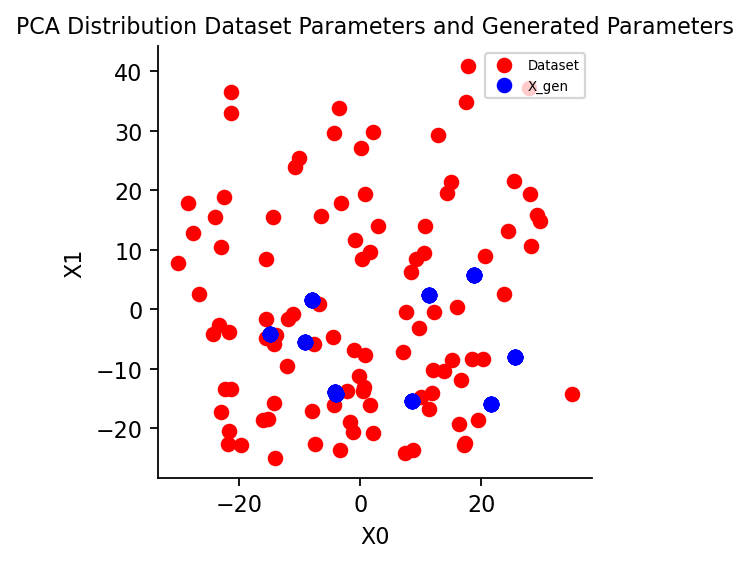

In [10]:

'''
NOW LETS DO A PCA
'''

pca = PCA(n_components = 2)

pca.fit(X)

A = np.random.randint(0,len(X),100)
B = np.random.randint(0,len(X_gen),100)

components_dataset = pca.transform(X[A])

components_gen = pca.transform(X_gen[B])

# Lets Plot PCA

title = 'PCA Distribution Dataset Parameters and Generated Parameters'

fig, axs = plt.subplots(1, 1, figsize=(3.5,3.5), dpi=160)

#plt.xlim(0,2000)

axs.spines["right"].set_visible(False)

axs.spines["top"].set_visible(False)

plt.rcParams['font.size'] = '10'       

axs.set_title(title, fontsize=10)

plt.xlabel('X0', fontsize = 10)

plt.ylabel('X1', fontsize = 10)

axs.plot(components_dataset[:,0], components_dataset[:,1], 'o', color = 'red', label = 'Dataset')

axs.plot(components_gen[:,0], components_gen[:,1], 'o', color = 'blue', label = 'X_gen')

      

plt.legend(fontsize = 6, loc = 'upper right')

plt.show()